In [1]:
import numpy as np
import jax
import jax.numpy as jnp

In [132]:
def compute_argument(seq_indices, vector_indices, N: int = 10000):
    return seq_indices / np.power(N, (2 * vector_indices / d))

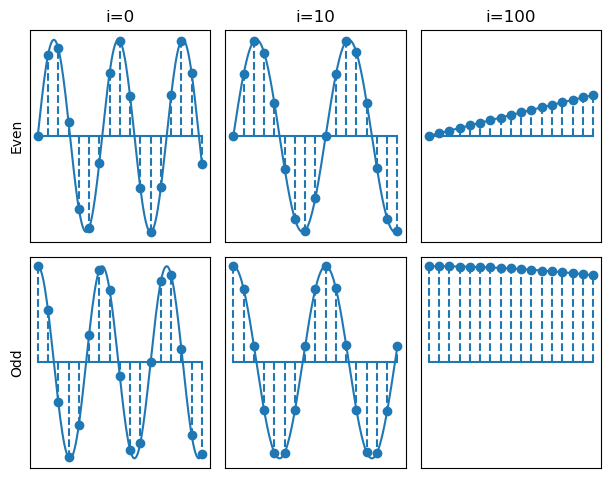

In [304]:
fig, axes = plt.subplots(2, 3, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

cmap = plt.get_cmap("tab20")

max_seq_idx = 16

for row_n, row_axes in enumerate(axes):
    for col_n, ax in enumerate(row_axes):
        
        func = np.sin if row_n == 0 else np.cos
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        seq_i = 10 ** col_n - (1 if col_n == 0 else 0)
        
        vector_index = np.array([seq_i])
        seq_index = np.arange(0, max_seq_idx+1)
        
        ax.stem(
            seq_index,
            func(compute_argument(seq_index, vector_index)),
            "k",
            basefmt="C0",
            linefmt="--",
            )

        seq_index_continuous = np.arange(0, max_seq_idx+0.1, 0.1)
        ax.plot(
            seq_index_continuous,
            func(compute_argument(seq_index_continuous, vector_index)),
            zorder=0,
            c=cmap(0),
            )

        if row_n == 0:
            ax.set_title(f"i={seq_i}")
        
        if col_n == 0 and row_n == 0:
            ax.set_ylabel("Even")
        elif col_n == 0 and row_n == 1:
            ax.set_ylabel("Odd")

plt.tight_layout()

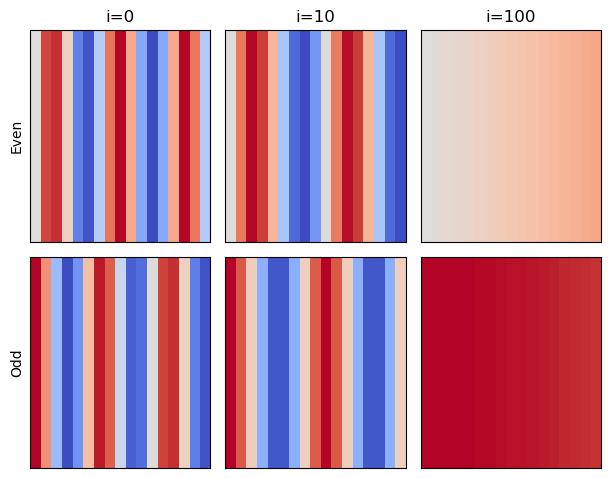

In [308]:
fig, axes = plt.subplots(2, 3, figsize=(6.2125984, 4.88189), sharex=True, sharey=True)

cmap = plt.get_cmap("coolwarm")

max_seq_idx = 16

for row_n, row_axes in enumerate(axes):
    for col_n, ax in enumerate(row_axes):
        
        func = np.sin if row_n == 0 else np.cos
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        seq_i = 10 ** col_n - (1 if col_n == 0 else 0)
        
        vector_index = np.array([seq_i])
        seq_index = np.arange(0, max_seq_idx+1)
        
        embeddings = func(compute_argument(seq_index, vector_index))[np.newaxis, :]
        
        ax.imshow(
            embeddings,
            aspect='auto',
            vmin=-1,
            vmax=1,
            cmap=cmap,
            )

        if row_n == 0:
            ax.set_title(f"i={seq_i}")
        
        if col_n == 0 and row_n == 0:
            ax.set_ylabel("Even")
        elif col_n == 0 and row_n == 1:
            ax.set_ylabel("Odd")

plt.tight_layout()

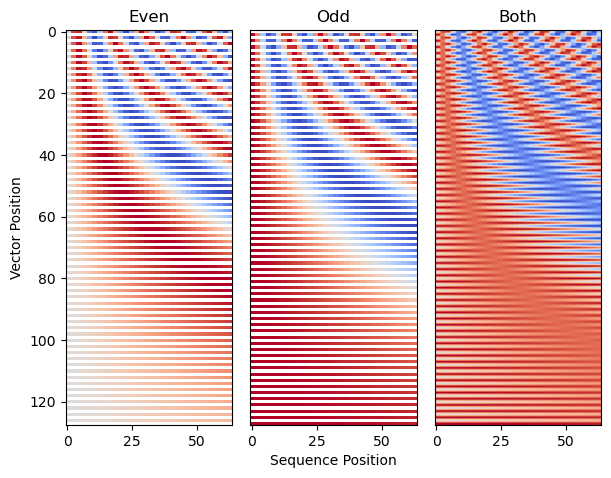

In [248]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("coolwarm")
cmap.set_bad("white")

fig, axes = plt.subplots(1, 3, figsize=(6.2125984, 4.88189))

vector_index = np.arange(0, 128)
seq_index = np.arange(0, 64)

xx, yy = np.meshgrid(seq_index, vector_index)

args = compute_argument(xx // 2, yy)

even = np.sin(args)
odds = np.cos(args)
aggregate = np.empty_like(even)

aggregate[0::2, :] = even[0::2, :]
aggregate[1::2, :] = odds[1::2, :]

even[1::2, :] = np.nan
odds[0::2, :] = np.nan

axes[0].imshow(
    even,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
    interpolation='nearest',
    )
#axes[0].set_xticks([])
#axes[0].set_yticks([])
axes[0].set_title("Even")

axes[1].imshow(
    odds,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
    interpolation='nearest',
    )
#axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title("Odd")

axes[2].imshow(
    aggregate,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap=cmap,
    )
#axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title("Both")

axes[1].set_xlabel("Sequence Position")
axes[0].set_ylabel("Vector Position")

plt.tight_layout()

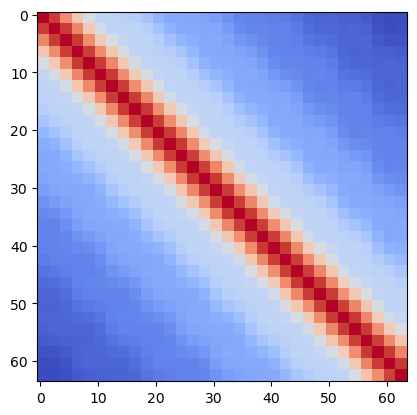

In [318]:
d = 512
T = 64

vector_index = np.arange(0, d)
seq_index = np.arange(0, T)

xx, yy = np.meshgrid(seq_index, vector_index)

args = compute_argument(xx // 2, yy)

even = np.sin(args)
odds = np.cos(args)
aggregate = np.empty_like(even)

aggregate[0::2, :] = even[0::2, :]
aggregate[1::2, :] = odds[1::2, :]

cos_dist = (aggregate.T @ aggregate) / np.power(np.linalg.norm(aggregate, axis=0), 2)

plt.imshow(
    cos_dist,
    #vmin=-1,
    #vmax=1,
    cmap="coolwarm"
    )